# Neural firing during baseline activity in visual cortex
<p>Figures: example raw signal, power spectra with SpecParam fit superimposed, schematic of parameters in baseline, histogram of parameters across channels in baseline
<p>
<p>created: September 18, 2024
<p>last modified: September 23, 2024


## Set-up

In [9]:
# auto-reload
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
!pip install fooof

In [11]:
# general
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec

from neurodsp.utils import create_times
from neurodsp.spectral import compute_spectrum
from specparam.plts.annotate import plot_annotated_model
from fooof import FOOOF

# custom
import sys
sys.path.append("../../code")
from paths import PROJECT_PATH, EXTERNAL_PATH
from info import SESSIONS, FS, TOTAL_CHANS, EPOCH_TIMES
from settings import SPECPARAM_SETTINGS, FREQS, BANDS
from plots import plot_schematic

In [25]:
# set plotting style
plt.style.use('../../mpl_styles/sfn_2024.mplstyle')

### Functions

### Create output directory

In [13]:
dir_out = f"{PROJECT_PATH}/figures/sfn_2024"
if not os.path.exists(dir_out):
    os.makedirs(dir_out)

#### load data

In [15]:
# choose a random array from session of interest
lfp = np.load(fr"{EXTERNAL_PATH}\data\lfp\lfp_epochs\L_SNR_250717\NSP6_array11_LFP.npy")

## Main

### Raw signal

(500,)
(500,)


Text(0.5, 0, 'time (s)')

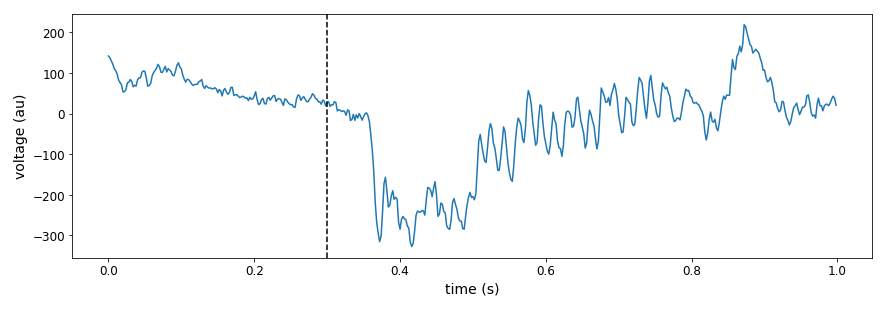

In [16]:
# create time-vector
n_seconds = lfp.shape[2]/FS
time = create_times(n_seconds, FS)
print(time.shape)

# set signal and choose random channel
i_trial = 42
i_chan = 23
signal = lfp[i_trial, i_chan]
print(signal.shape)

# plot
fig, ax = plt.subplots(figsize=(12,4))
ax.plot(time, signal)
ax.axvline(x=0.3, c='black', linestyle='--')
ax.set_ylabel('voltage (au)')
ax.set_xlabel('time (s)')

### Power spectra with SpecParam superimposed

(251,) (66, 251) (251,)
                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  
                       The model was run on the frequency range 1 - 250 Hz                        
                                 Frequency Resolution is 1.00 Hz                                  
                                                                                                  
                         Aperiodic Parameters (offset, knee, exponent):                           
                                     4.6974, 11.6257, 2.4008                                      
                                                                                                  
                                       3 peaks were found:                           

c:\Users\micha\anaconda3\envs\v1v4\lib\site-packages\fooof\plts\style.py:191: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.tight_layout()


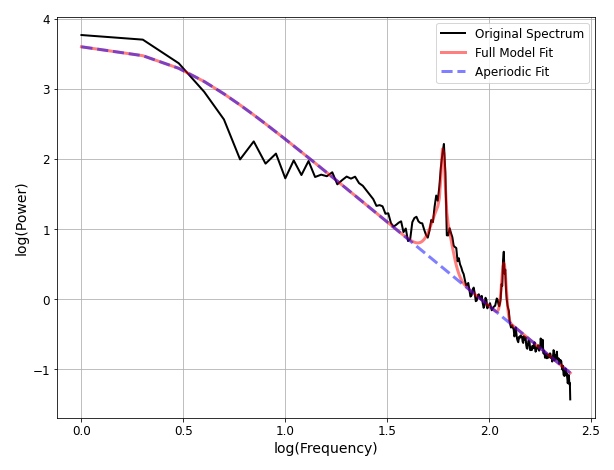

In [17]:
# compute power 
freq, psd = compute_spectrum(lfp[:, i_chan], FS)#, f_range=[1,45])
spectra = np.mean(psd, axis=0)
print(freq.shape, psd.shape, spectra.shape)

# parameterize
fm = FOOOF(**SPECPARAM_SETTINGS)
fm.report(freq, spectra, plt_log=True) # fit and plot

### Schematic baseline parameters

In [18]:
# load spectral parameters
params = pd.read_csv(fR"{EXTERNAL_PATH}\data\results\lfp_spectral_params.csv", index_col=0)

In [19]:
# # plot and save in external drive
# for i_session, session in enumerate(SESSIONS):

#     # create directory for figure output
#     dir_figs = f"{EXTERNAL_PATH}/figures/params_schematic/{session}"
#     if not os.path.exists(dir_figs):
#         os.makedirs(dir_figs)


#     # get data for session
#     df_session = params[params['session']==session]
#     df_pre = df_session[df_session['epoch'] == 'pre']
#     df_post = df_session[df_session['epoch'] == 'post']

#     # define odml file path (contains metadata including electrode positions)
#     odml_path = f"{EXTERNAL_PATH}/V1_v4_1024_electrode_resting_state_data/data/{session}/metadata_{session}.odml"

#     # look through features
#     for var in ['offset', 'exponent', 'knee', 'r_squared']:
#         # setting limits for colorbar
#         all_values = np.append(df_pre[f"{var}"], df_post[f"{var}"])
#         maxli = np.nanmax(all_values)
#         minli = np.nanmin(all_values)

#         # pre-stimulus
#         plot_schematic(df_pre[var], odml_path, title=f"session: {session}", 
#                         label=f"pre-stimulus {var}", vmin=minli, vmax=maxli, 
#                         fname_out=f"{dir_figs}/{session}_{var}_pre.png");
#         # post-stimulus
#         plot_schematic(df_post[var], odml_path, title=f"session: {session}", 
#                         label=f"post-stimulus {var}", vmin=minli, vmax=maxli, 
#                         fname_out=f"{dir_figs}/{session}_{var}_post.png");

#         # change in var
#         diff = df_post[var].values - df_pre[var].values
#         plot_schematic(diff, odml_path, norm_type="centered", title=f"session: {session}", 
#                         label=f"difference in {var}", vmin=np.nanmin(diff), vmax=np.nanmax(diff), 
#                         fname_out=f"{dir_figs}/{session}_{var}_diff.png");

#         plt.close('all')


### Histogram baseline parameters

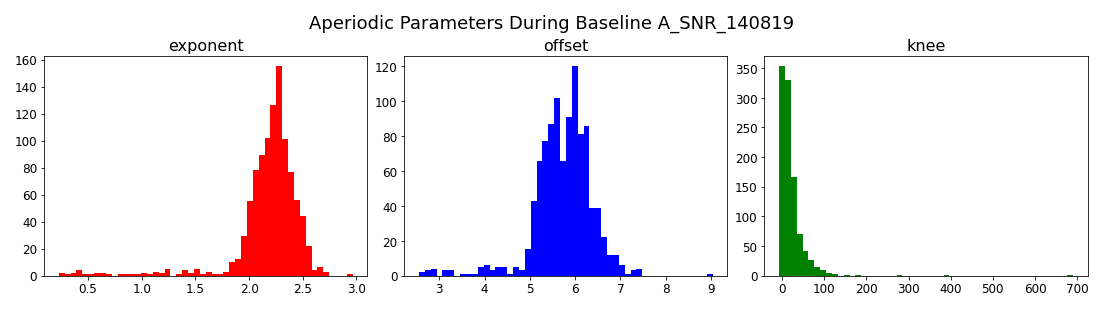

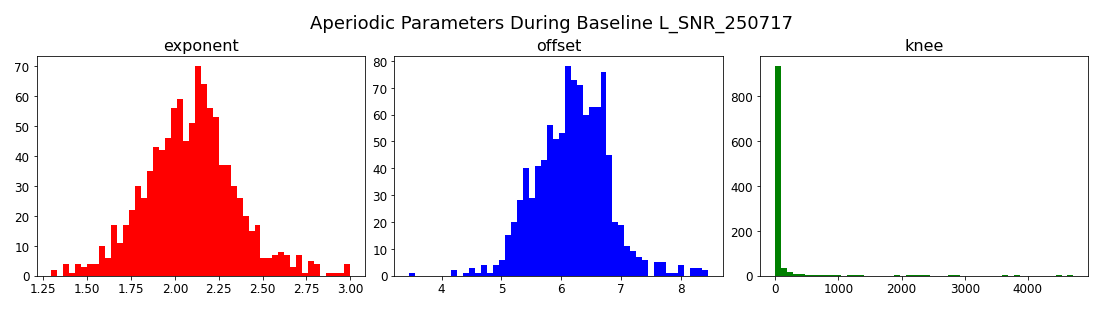

In [20]:
# plot params histogram for baseline
for session in SESSIONS:

    df = params[(params['session']  == session) & (params['epoch'] == 'pre')]

    fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,4))
    #exp
    ax1.hist(df.get('exponent'), bins=50, color='red')
    ax1.set_title('exponent')

    #off
    ax2.hist(df.get('offset'), bins=50, color='blue')
    ax2.set_title('offset')

    #knee
    ax3.hist(df.get('knee'), bins=50, color='green')
    ax3.set_title('knee')

    fig.suptitle(f'Aperiodic Parameters During Baseline {session}')
    fig.savefig(f'{EXTERNAL_PATH}/figures/params_schematic/{session}/params_histogram.png')

### combine figures

warning[None:5:<{http://www.w3.org/1999/xsl/transform}stylesheet>]: Invalid element <{http://www.w3.org/1999/xsl/transform}stylesheet> inside <odML> tag
 (line 5)
warning[None:5:<{http://www.w3.org/1999/xsl/transform}stylesheet>]: Invalid element <{http://www.w3.org/1999/xsl/transform}stylesheet> in odML document section <odML>  (line 5)
Validation found 0 errors and 1 warnings in 0 Sections and 1 Properties.
warning[None:5:<{http://www.w3.org/1999/xsl/transform}stylesheet>]: Invalid element <{http://www.w3.org/1999/xsl/transform}stylesheet> inside <odML> tag
 (line 5)
warning[None:5:<{http://www.w3.org/1999/xsl/transform}stylesheet>]: Invalid element <{http://www.w3.org/1999/xsl/transform}stylesheet> in odML document section <odML>  (line 5)


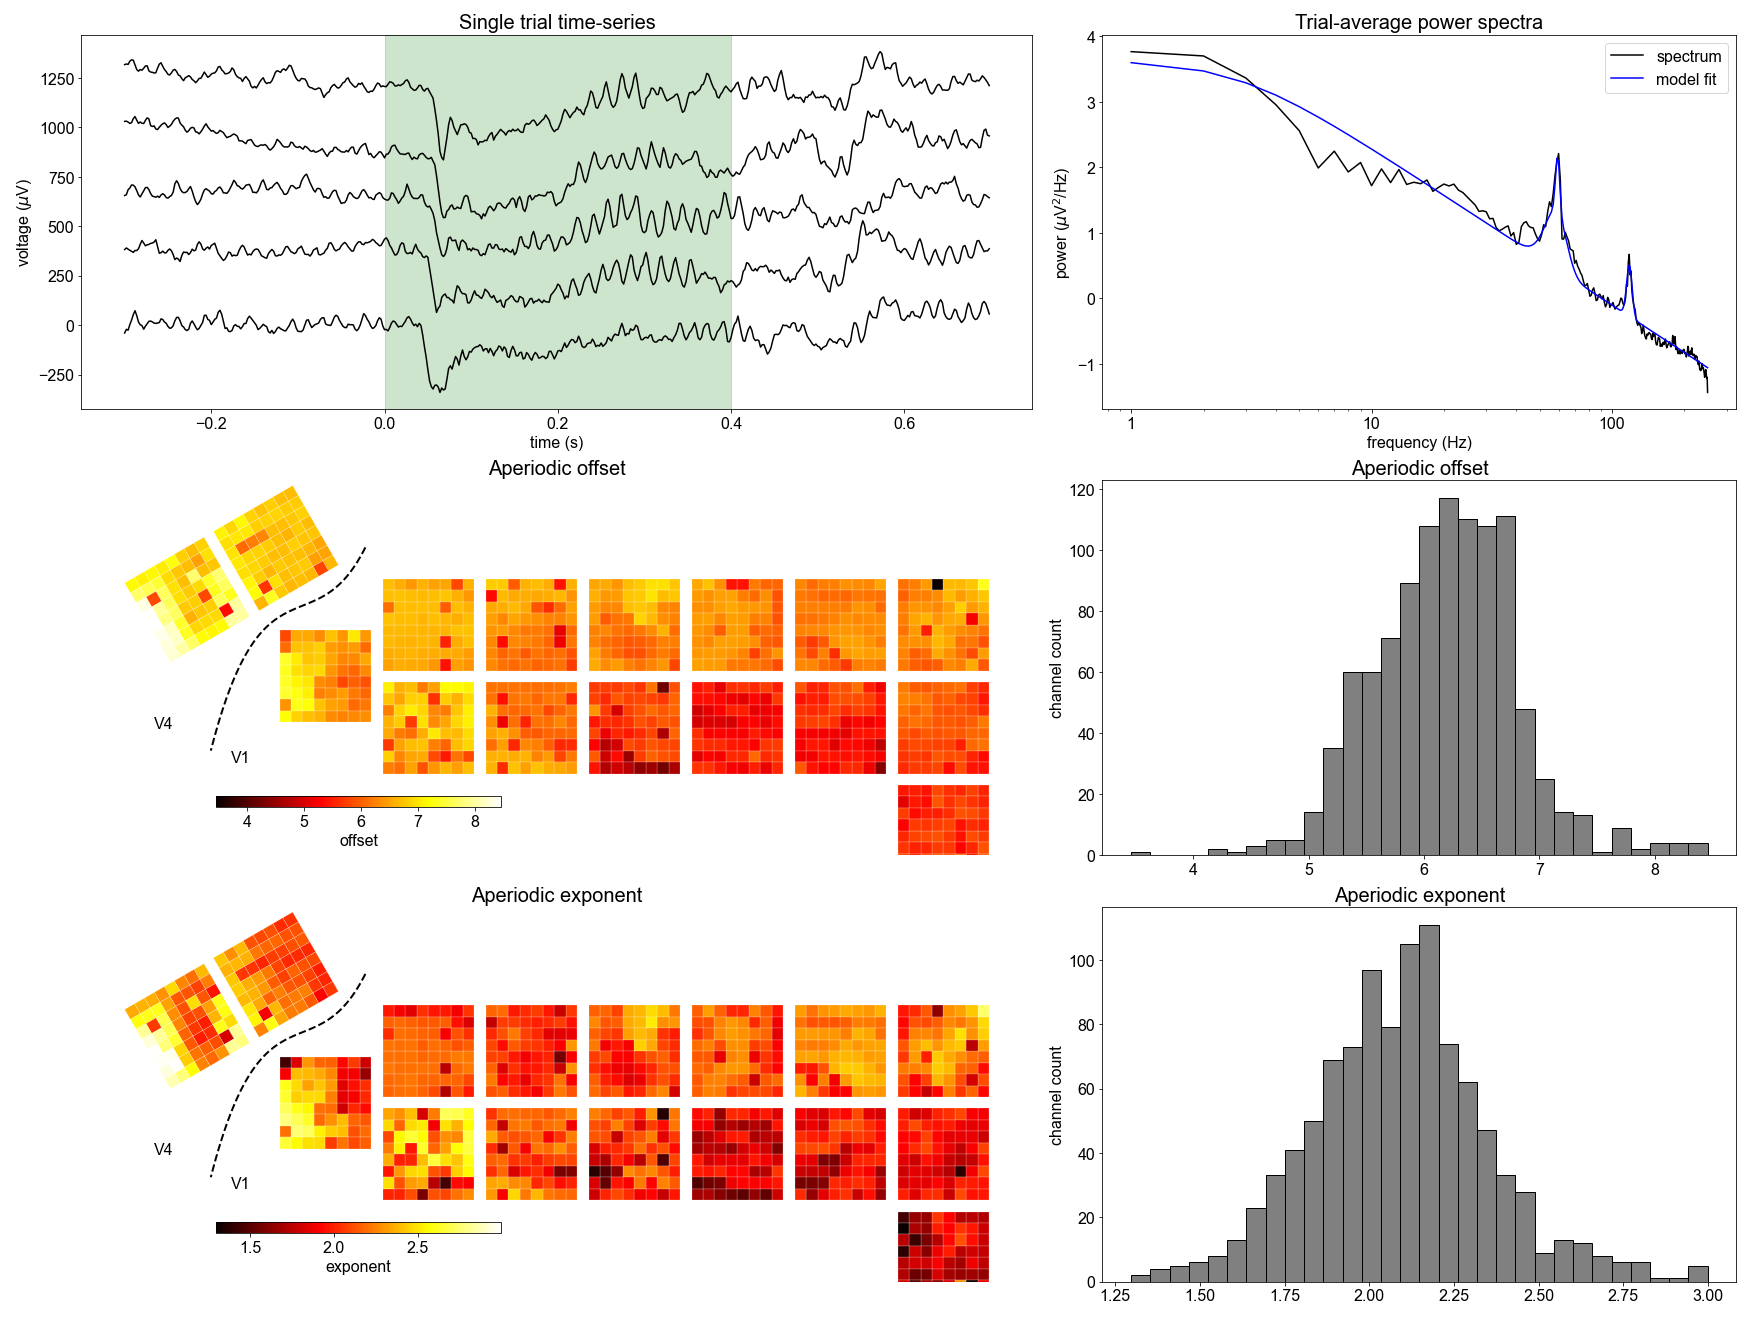

In [26]:

# create figure and gridspec
fig = plt.figure(figsize=[24,18], constrained_layout=True)
spec = gridspec.GridSpec(figure=fig, ncols=2, nrows=3, width_ratios=[1.5,1.0],
                         height_ratios=[1,1,1])
ax_a = fig.add_subplot(spec[0,0])
ax_b = fig.add_subplot(spec[0,1])
ax_c = fig.add_subplot(spec[1,0])
ax_d = fig.add_subplot(spec[1,1])
ax_e = fig.add_subplot(spec[2,0])
ax_f = fig.add_subplot(spec[2,1])

# set titles
ax_a.set_title('Single trial time-series')
ax_b.set_title('Trial-average power spectra')
ax_c.set_title('Aperiodic offset')
ax_d.set_title('Aperiodic offset')
ax_e.set_title('Aperiodic exponent')
ax_f.set_title('Aperiodic exponent')

# plot subplot a-b: single channel time-series and power spectrum --------------

# plot time-series
time = create_times(n_seconds, FS, start_val=EPOCH_TIMES[0])
# ax_a.plot(time, signal, color='k')
for i_trial in range(5):
    signal = lfp[i_trial, i_chan] + i_trial*300
    ax_a.plot(time, signal, color='k')
ax_a.axvspan(0, 0.4, color='g', alpha=0.2)
ax_a.set_ylabel('voltage ($\mu$V)')
ax_a.set_xlabel('time (s)')

# # plot subplot b
ax_b.plot(fm.freqs, fm.power_spectrum, color='k', label='spectrum')
ax_b.plot(fm.freqs, fm.fooofed_spectrum_, color='b', label='model fit')
ax_b.set(xlabel='frequency (Hz)', ylabel='power ($\mu$V$^2$/Hz)')
ax_b.set_xscale('log')
ax_b.set_xticks([1, 10, 100], ['1', '10', '100'])
ax_b.legend()

# plot subplot c-f: schematic and histogram for offset and exponent ------------
odml_path = f"{EXTERNAL_PATH}/V1_v4_1024_electrode_resting_state_data/data/{session}/metadata_{session}.odml"

# loop through offset and exponent
for var, ax_schem, ax_hist in zip(['offset', 'exponent'], 
                                  [ax_c, ax_e], 
                                  [ax_d, ax_f]):
    # get data for session, epoch, and variable
    values = params.loc[(params['session']==session) & 
                        (params['epoch']=='pre'), var]
    
    # plot schematic
    plot_schematic(values, odml_path, label=var, ax=ax_schem)

    # plot histogram
    ax_hist.hist(values, bins=30, color='gray', edgecolor='k')
    ax_hist.set_ylabel('channel count')

# save figure
plt.savefig(f'{dir_out}/panel_5.png')
